<a href="https://colab.research.google.com/github/Leticiamelgar/Nim/blob/main/C%C3%B3pia_de_NIM_BUSCAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

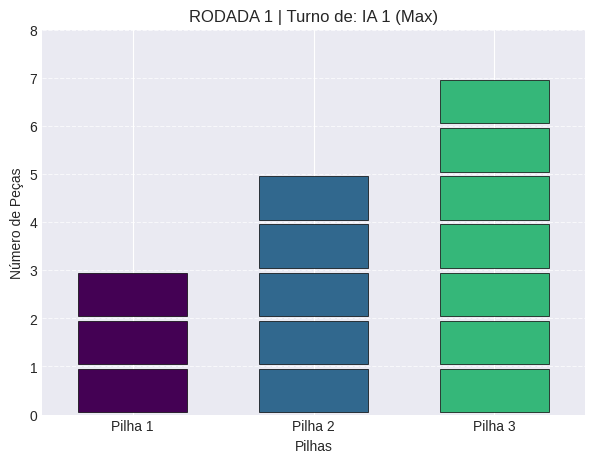

>> IA 1 (Max) removeu 1 peça(s) da Pilha 1


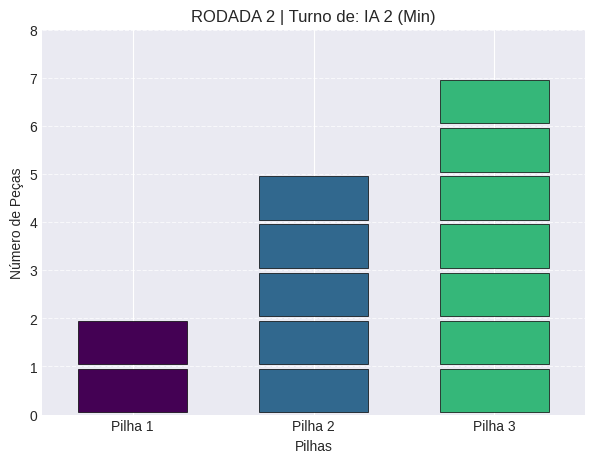

>> IA 2 (Min) removeu 1 peça(s) da Pilha 1


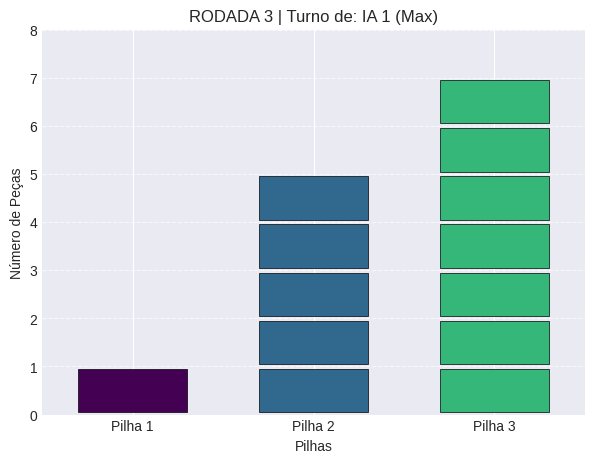

>> IA 1 (Max) removeu 3 peça(s) da Pilha 3


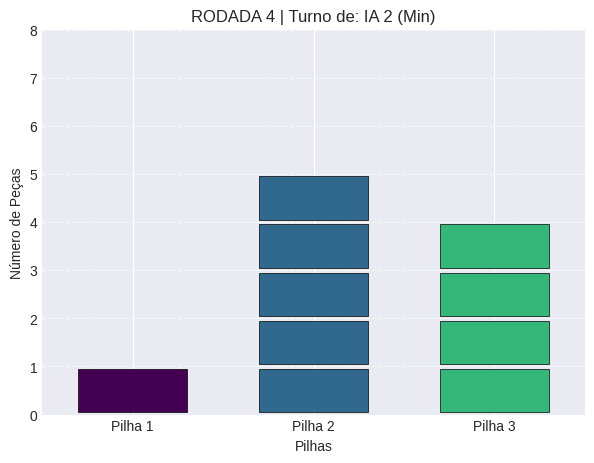

>> IA 2 (Min) removeu 1 peça(s) da Pilha 1


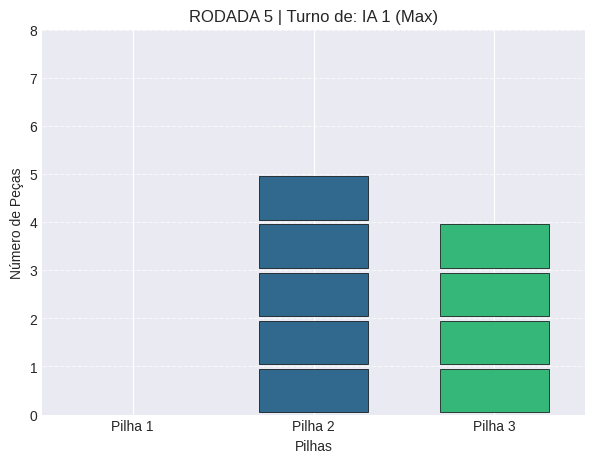

>> IA 1 (Max) removeu 1 peça(s) da Pilha 2


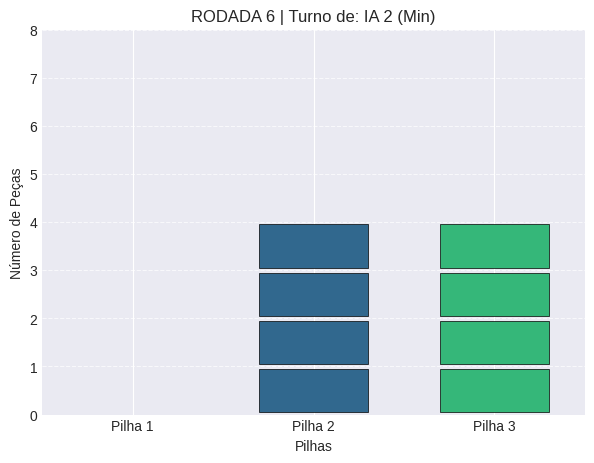

>> IA 2 (Min) removeu 1 peça(s) da Pilha 2


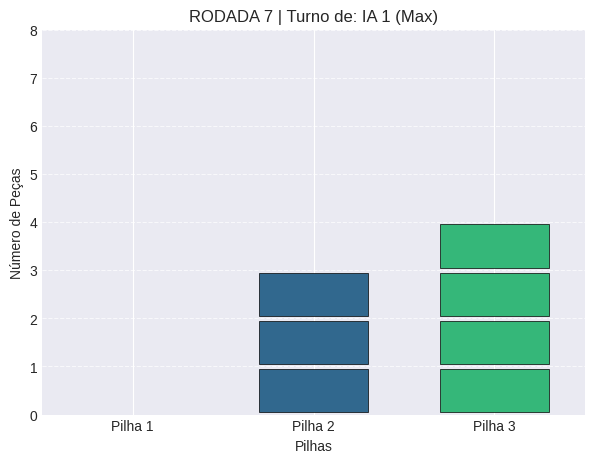

>> IA 1 (Max) removeu 1 peça(s) da Pilha 3


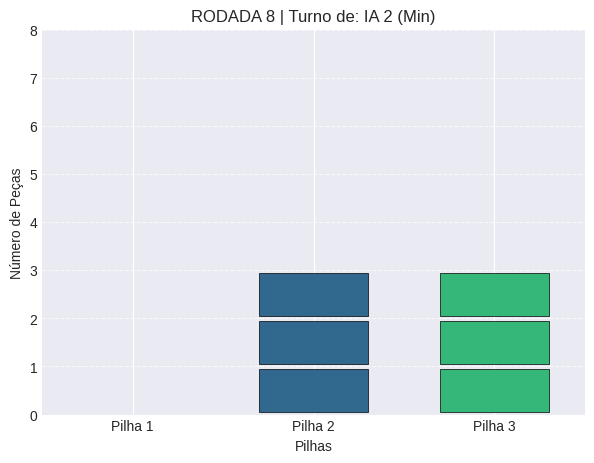

>> IA 2 (Min) removeu 1 peça(s) da Pilha 2


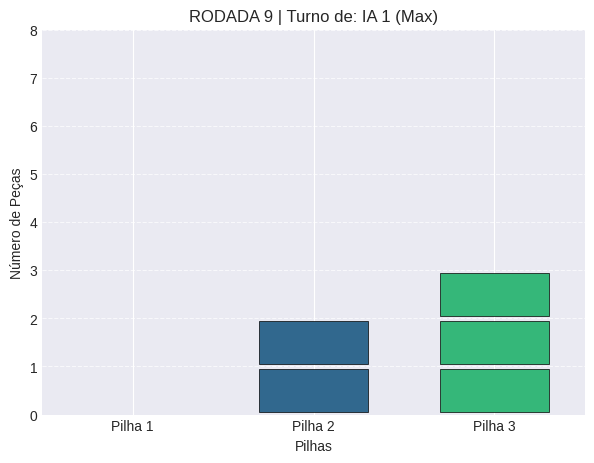

>> IA 1 (Max) removeu 1 peça(s) da Pilha 3


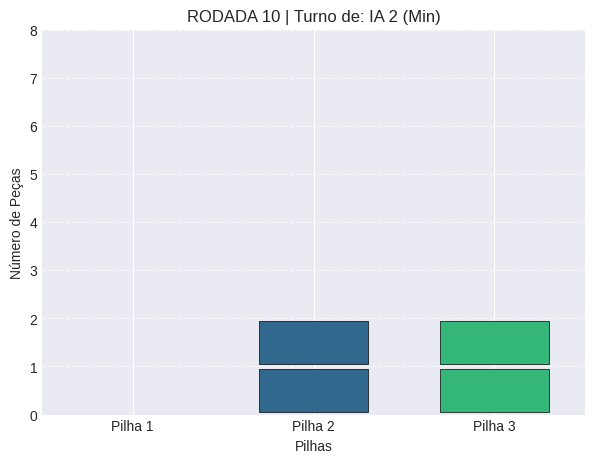

>> IA 2 (Min) removeu 1 peça(s) da Pilha 2


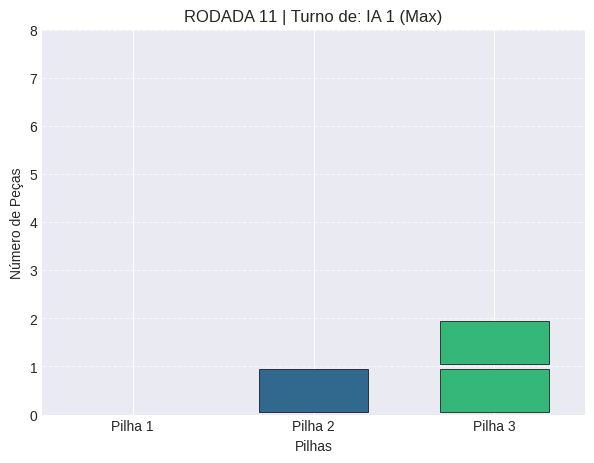

>> IA 1 (Max) removeu 1 peça(s) da Pilha 3


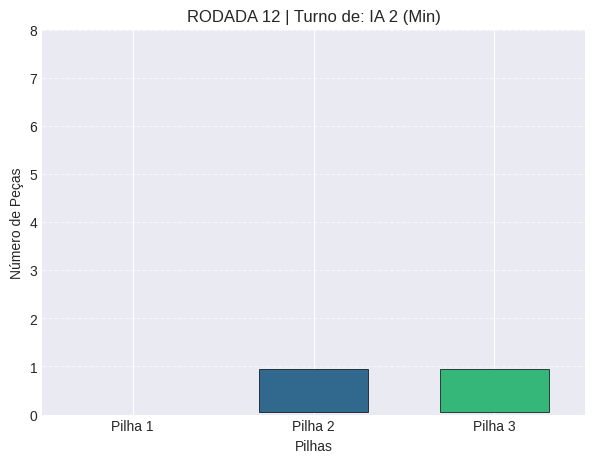

>> IA 2 (Min) removeu 1 peça(s) da Pilha 2


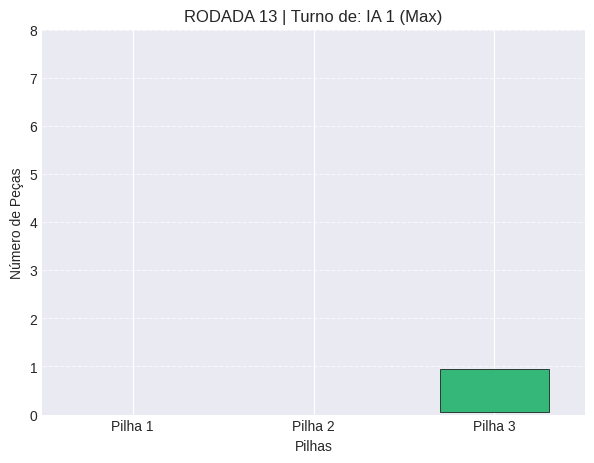

>> IA 1 (Max) removeu 1 peça(s) da Pilha 3


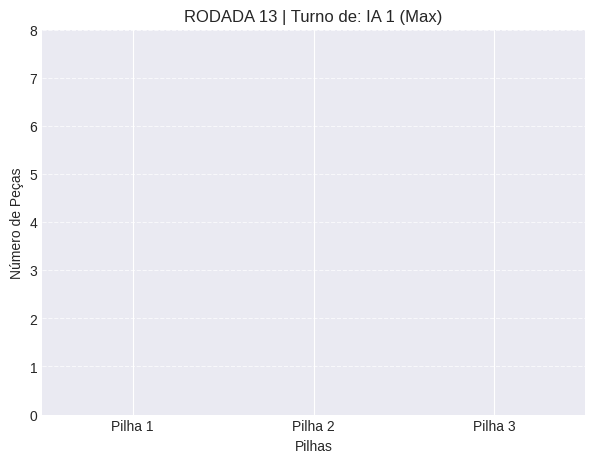


🏆 FIM DE JOGO! O vencedor foi: IA 1 (Max)


In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns # Keep seaborn import as it might be used elsewhere or preferred for general styling
import time # Para adicionar um pequeno delay entre as visualizações

class NimGame:
    def __init__(self, initial_state=(3, 5, 7)):
        self.state = initial_state
        self.initial_state_max_val = max(initial_state) # Para manter o eixo Y consistente
        self.memo = {}

    def display_state(self, state, turn_count, player_name):
        fig, ax = plt.subplots(figsize=(7, 5))
        colors = plt.cm.viridis([i/len(state) for i in range(len(state))]) # Cores para as pilhas

        ax.set_title(f"RODADA {turn_count} | Turno de: {player_name}")
        ax.set_xlabel("Pilhas")
        ax.set_ylabel("Número de Peças")
        ax.set_xlim(-0.5, len(state) - 0.5) # Ajusta o limite X para centralizar as pilhas
        ax.set_ylim(0, self.initial_state_max_val + 1)
        ax.set_xticks(range(len(state)))
        ax.set_xticklabels([f'Pilha {i+1}' for i in range(len(state))])
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Desenha as peças como retângulos empilhados
        for i, count in enumerate(state):
            for j in range(count):
                rect = plt.Rectangle((i - 0.3, j + 0.05), 0.6, 0.9, color=colors[i]) # x, y, width, height
                ax.add_patch(rect)
                # Opcional: Adicionar borda para melhor visualização
                rect.set_edgecolor('black')
                rect.set_linewidth(0.5)

        plt.show()
        plt.close() # Fecha a figura para evitar acúmulo de gráficos
        time.sleep(0.5) # Pequeno delay para visualizar cada rodada

    def get_moves(self, state):
        moves = []
        for i, count in enumerate(state):
            for amount in range(1, count + 1):
                new_state = list(state)
                new_state[i] -= amount
                moves.append(tuple(new_state))
        return moves

    def is_over(self, state):
        return sum(state) == 0

    def alphabeta(self, state, depth, alpha, beta, maximizing):
        state_key = (state, maximizing)
        if state_key in self.memo:
            return self.memo[state_key]

        if self.is_over(state):
            # Se terminou no turno do Max, significa que o Min pegou a última (Max ganha)
            return -1 if maximizing else 1

        if depth == 0:
            return 0

        if maximizing:
            v = -math.inf
            for move in self.get_moves(state):
                v = max(v, self.alphabeta(move, depth - 1, alpha, beta, False))
                alpha = max(alpha, v)
                if beta <= alpha: break
            self.memo[state_key] = v
            return v
        else:
            v = math.inf
            for move in self.get_moves(state):
                v = min(v, self.alphabeta(move, depth - 1, alpha, beta, True))
                beta = min(beta, v)
                if beta <= alpha: break
            self.memo[state_key] = v
            return v

    def get_best_move(self, state):
        best_v = -math.inf
        best_move = None
        for move in self.get_moves(state):
            # O próximo nível é o Minimizador (False)
            value = self.alphabeta(move, 15, -math.inf, math.inf, False)
            if value > best_v:
                best_v = value
                best_move = move
        return best_move

# --- SIMULAÇÃO DO JOGO COMPLETO ---

def simular_jogo():
    jogo = NimGame((3, 5, 7))
    estado_atual = jogo.state
    turno = 1

    # Definimos dois "jogadores" IA
    # Jogador 1 tenta ganhar, Jogador 2 também (mas para o código, invertemos a perspectiva)

    while not jogo.is_over(estado_atual):
        jogador_atual = "IA 1 (Max)" if turno % 2 != 0 else "IA 2 (Min)"

        # Agora display_state vai gerar um gráfico
        jogo.display_state(estado_atual, turno, jogador_atual)

        # A IA calcula a melhor jogada
        proximo_estado = jogo.get_best_move(estado_atual)

        # Mostrar o que foi removido (ainda em texto, pode ser visualizado no gráfico anterior)
        for i in range(len(estado_atual)): # Usar len(estado_atual) para ser mais genérico
            diff = estado_atual[i] - proximo_estado[i]
            if diff > 0:
                print(f">> {jogador_atual} removeu {diff} peça(s) da Pilha {i+1}")

        estado_atual = proximo_estado
        if jogo.is_over(estado_atual):
            # Exibe o estado final (todos zeros)
            jogo.display_state(estado_atual, turno, jogador_atual)
            print(f"\n🏆 FIM DE JOGO! O vencedor foi: {jogador_atual}")
            break

        turno += 1

if __name__ == "__main__":
    simular_jogo()

Comparando algoritmos para o estado: (3, 4, 5)
--------------------------------------------------


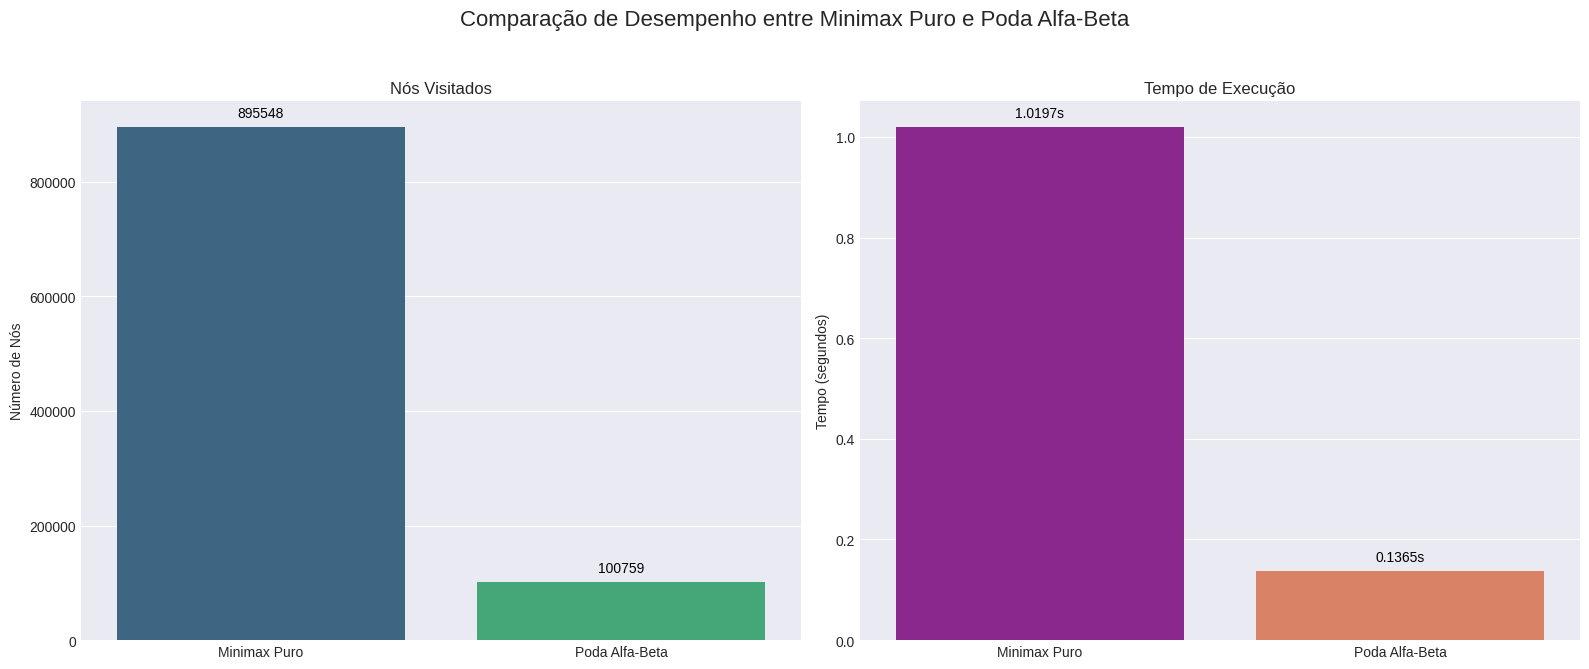

In [ ]:
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

class NimGame:
    def __init__(self, initial_state=(3, 4, 5)):
        self.state = initial_state
        self.nodes_count = 0

    def display_state(self, state, turn_count, player_name):
        print(f"\n--- RODADA {turn_count} | Turno de: {player_name} ---")
        for i, count in enumerate(state):
            visual = "|" * count
            print(f"Pilha {i+1} ({count}): {visual}")
        print("-" * 35)

    def get_moves(self, state):
        moves = []
        for i, count in enumerate(state):
            for amount in range(1, count + 1):
                new_state = list(state)
                new_state[i] -= amount
                moves.append(tuple(new_state))
        return moves

    def is_over(self, state):
        return sum(state) == 0

    def evaluate(self, state, maximizing):
        if self.is_over(state):
            return -1 if maximizing else 1
        return 0

    # --- MINIMAX PURO ---
    def minimax_pure(self, state, depth, maximizing):
        self.nodes_count += 1
        if depth == 0 or self.is_over(state):
            return self.evaluate(state, maximizing)

        if maximizing:
            v = -math.inf
            for move in self.get_moves(state):
                v = max(v, self.minimax_pure(move, depth - 1, False))
            return v
        else:
            v = math.inf
            for move in self.get_moves(state):
                v = min(v, self.minimax_pure(move, depth - 1, True))
            return v

    # --- PODA ALFA-BETA ---
    def alphabeta(self, state, depth, alpha, beta, maximizing):
        self.nodes_count += 1
        if depth == 0 or self.is_over(state):
            return self.evaluate(state, maximizing)

        if maximizing:
            v = -math.inf
            for move in self.get_moves(state):
                v = max(v, self.alphabeta(move, depth - 1, alpha, beta, False))
                alpha = max(alpha, v)
                if beta <= alpha:
                    break  # Poda ocorre aqui
            return v
        else:
            v = math.inf
            for move in self.get_moves(state):
                v = min(v, self.alphabeta(move, depth - 1, alpha, beta, True))
                beta = min(beta, v)
                if beta <= alpha:
                    break  # Poda ocorre aqui
            return v

def comparar_algoritmos():
    # Usando (3, 4, 5) para que o Minimax puro termine em tempo razoável
    estado_teste = (3, 4, 5)
    jogo = NimGame(estado_teste)
    profundidade = 10

    print(f"Comparando algoritmos para o estado: {estado_teste}")
    print("-" * 50)

    # Teste Minimax Puro
    jogo.nodes_count = 0
    start = time.time()
    res_minimax = jogo.minimax_pure(estado_teste, profundidade, True)
    end = time.time()
    tempo_minimax = end - start
    nodes_minimax = jogo.nodes_count

    # Teste Alfa-Beta
    jogo.nodes_count = 0
    start = time.time()
    res_alphabeta = jogo.alphabeta(estado_teste, profundidade, -math.inf, math.inf, True)
    end = time.time()
    tempo_alphabeta = end - start
    nodes_alphabeta = jogo.nodes_count

    # --- RESULTADOS (Gráficos) ---
    algorithms = ['Minimax Puro', 'Poda Alfa-Beta']
    nodes = [nodes_minimax, nodes_alphabeta]
    times = [tempo_minimax, tempo_alphabeta]

    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Comparação de Desempenho entre Minimax Puro e Poda Alfa-Beta', fontsize=16)

    # Gráfico de Nós Visitados
    sns.barplot(x=algorithms, y=nodes, ax=axes[0], palette='viridis', hue=algorithms, legend=False)
    axes[0].set_title('Nós Visitados')
    axes[0].set_ylabel('Número de Nós')
    for i, v in enumerate(nodes):
        axes[0].text(i, v + (max(nodes) * 0.02), f'{v}', color='black', ha='center', fontsize=10)

    # Gráfico de Tempo de Execução
    sns.barplot(x=algorithms, y=times, ax=axes[1], palette='plasma', hue=algorithms, legend=False)
    axes[1].set_title('Tempo de Execução')
    axes[1].set_ylabel('Tempo (segundos)')
    for i, v in enumerate(times):
        axes[1].text(i, v + (max(times) * 0.02), f'{v:.4f}s', color='black', ha='center', fontsize=10)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para evitar sobreposição do título principal
    plt.show()

if __name__ == "__main__":
    comparar_algoritmos()


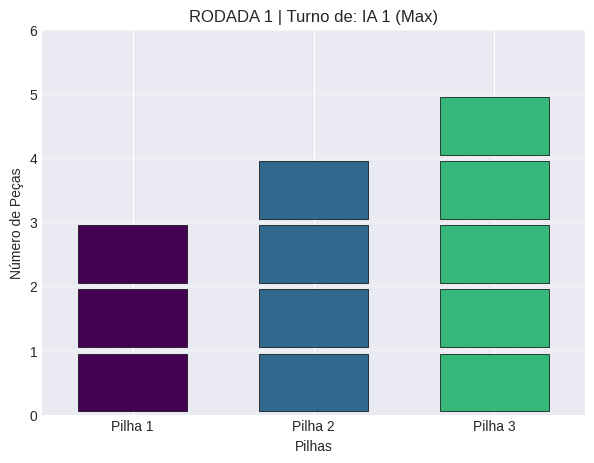

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 1011047 nós em 1.1543s
   > Alfa-Beta   : 194204 nós em 0.2682s
   > Eficiência  : Poda evitou 80.8% da árvore.

👉 IA 1 (Max) removeu 2 peça(s) da Pilha 1


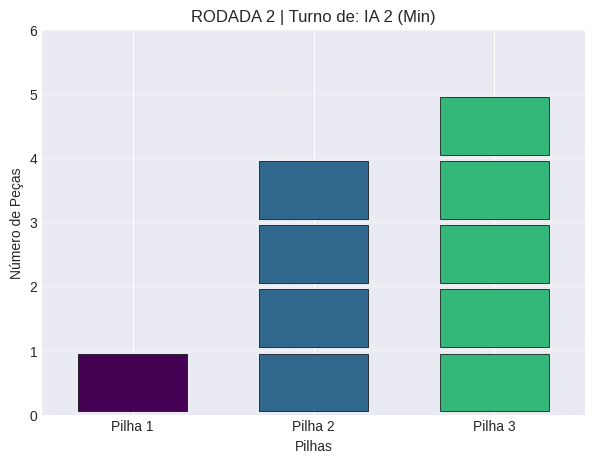

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 41992 nós em 0.0483s
   > Alfa-Beta   : 14449 nós em 0.0197s
   > Eficiência  : Poda evitou 65.6% da árvore.

👉 IA 2 (Min) removeu 1 peça(s) da Pilha 1


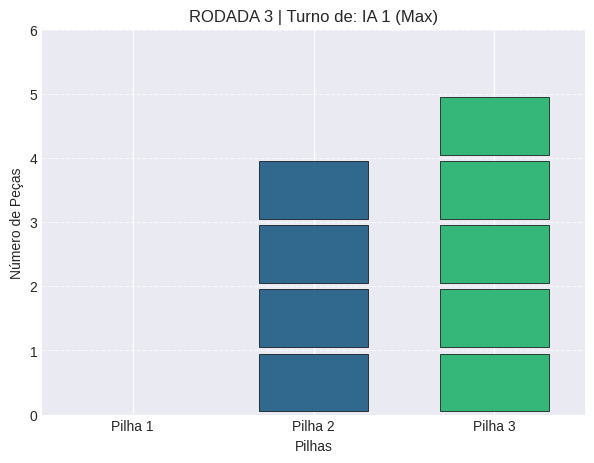

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 5321 nós em 0.0059s
   > Alfa-Beta   : 3066 nós em 0.0041s
   > Eficiência  : Poda evitou 42.4% da árvore.

👉 IA 1 (Max) removeu 1 peça(s) da Pilha 3


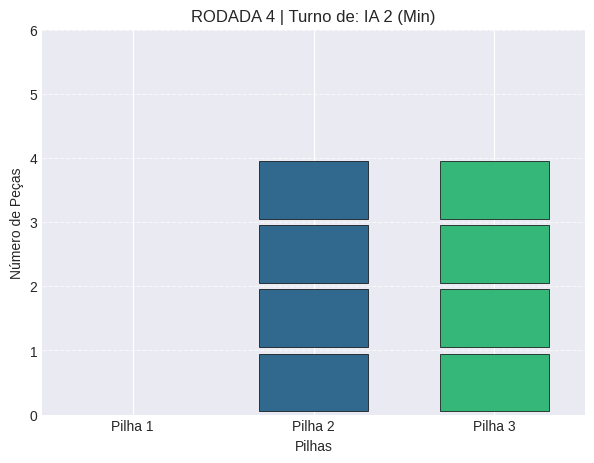

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 1920 nós em 0.0023s
   > Alfa-Beta   : 1093 nós em 0.0015s
   > Eficiência  : Poda evitou 43.1% da árvore.

👉 IA 2 (Min) removeu 1 peça(s) da Pilha 2


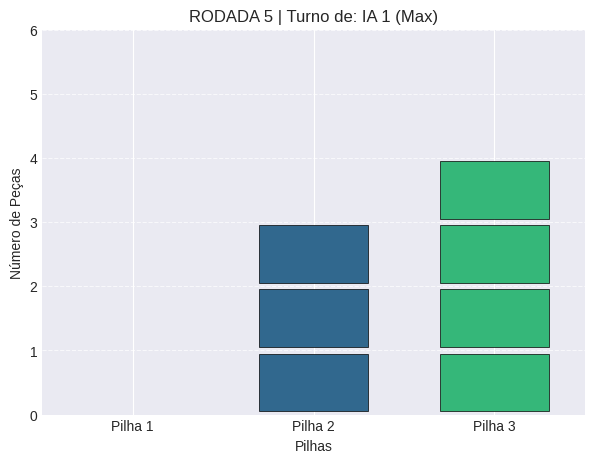

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 663 nós em 0.0014s
   > Alfa-Beta   : 483 nós em 0.0012s
   > Eficiência  : Poda evitou 27.1% da árvore.

👉 IA 1 (Max) removeu 1 peça(s) da Pilha 3


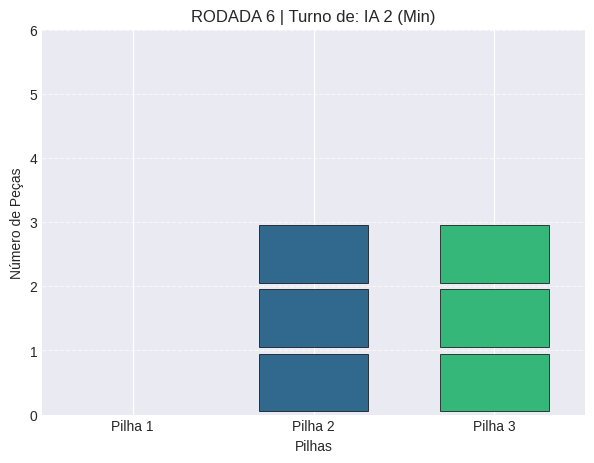

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 244 nós em 0.0005s
   > Alfa-Beta   : 188 nós em 0.0005s
   > Eficiência  : Poda evitou 23.0% da árvore.

👉 IA 2 (Min) removeu 1 peça(s) da Pilha 2


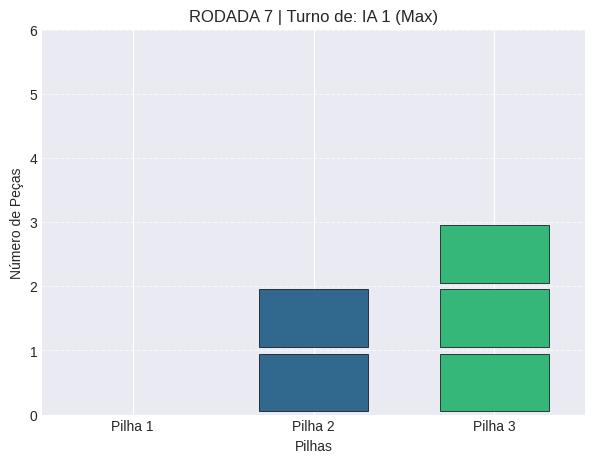

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 85 nós em 0.0001s
   > Alfa-Beta   : 76 nós em 0.0001s
   > Eficiência  : Poda evitou 10.6% da árvore.

👉 IA 1 (Max) removeu 1 peça(s) da Pilha 3


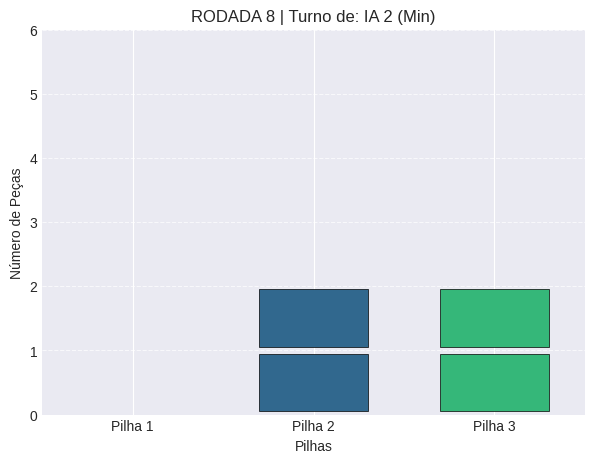

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 32 nós em 0.0001s
   > Alfa-Beta   : 31 nós em 0.0000s
   > Eficiência  : Poda evitou 3.1% da árvore.

👉 IA 2 (Min) removeu 1 peça(s) da Pilha 2


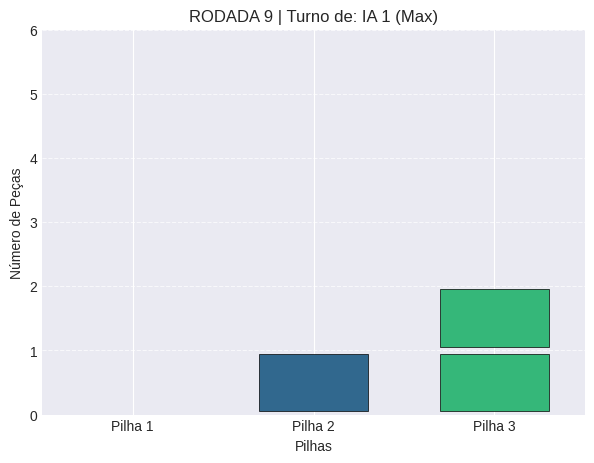

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 11 nós em 0.0001s
   > Alfa-Beta   : 11 nós em 0.0000s
   > Eficiência  : Poda evitou 0.0% da árvore.

👉 IA 1 (Max) removeu 1 peça(s) da Pilha 3


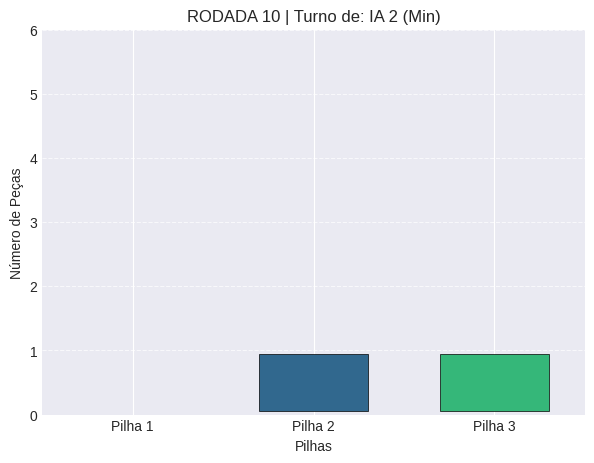

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 4 nós em 0.0000s
   > Alfa-Beta   : 4 nós em 0.0000s
   > Eficiência  : Poda evitou 0.0% da árvore.

👉 IA 2 (Min) removeu 1 peça(s) da Pilha 2


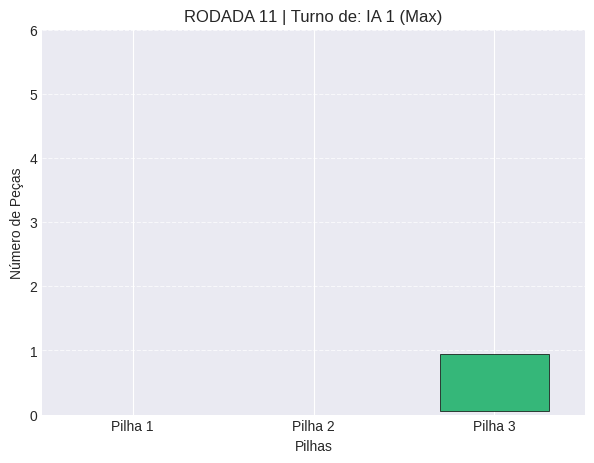

📊 [Estatísticas da Jogada]:
   > Minimax Puro: 1 nós em 0.0000s
   > Alfa-Beta   : 1 nós em 0.0000s
   > Eficiência  : Poda evitou 0.0% da árvore.

👉 IA 1 (Max) removeu 1 peça(s) da Pilha 3

🏆 FIM DE JOGO! O vencedor foi: IA 1 (Max)


In [ ]:
import math
import time
import matplotlib.pyplot as plt # Importar matplotlib
import seaborn as sns # Importar seaborn para paletas de cores, se necessário

class NimGame:
    def __init__(self, initial_state=(3, 4, 5)):
        self.state = initial_state
        self.nodes_visited = 0
        self.initial_state_max_val = max(initial_state) # Para manter o eixo Y consistente

    def display_state(self, state, turn_count, player_name):
        fig, ax = plt.subplots(figsize=(7, 5))
        colors = plt.cm.viridis([i/len(state) for i in range(len(state))]) # Cores para as pilhas

        ax.set_title(f"RODADA {turn_count} | Turno de: {player_name}")
        ax.set_xlabel("Pilhas")
        ax.set_ylabel("Número de Peças")
        ax.set_xlim(-0.5, len(state) - 0.5) # Ajusta o limite X para centralizar as pilhas
        ax.set_ylim(0, self.initial_state_max_val + 1)
        ax.set_xticks(range(len(state)))
        ax.set_xticklabels([f'Pilha {i+1}' for i in range(len(state))])
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Desenha as peças como retângulos empilhados
        for i, count in enumerate(state):
            for j in range(count):
                rect = plt.Rectangle((i - 0.3, j + 0.05), 0.6, 0.9, color=colors[i]) # x, y, width, height
                ax.add_patch(rect)
                # Opcional: Adicionar borda para melhor visualização
                rect.set_edgecolor('black')
                rect.set_linewidth(0.5)

        plt.show()
        plt.close() # Fecha a figura para evitar acúmulo de gráficos
        time.sleep(0.5) # Pequeno delay para visualizar cada rodada

    def get_moves(self, state):
        moves = []
        for i, count in enumerate(state):
            for amount in range(1, count + 1):
                new_state = list(state)
                new_state[i] -= amount
                moves.append(tuple(new_state))
        return moves

    def is_over(self, state):
        return sum(state) == 0

    def evaluate(self, state, maximizing):
        if self.is_over(state):
            # Se o jogo acabou no turno do Max, quem tirou a última foi o Min (Max vence)
            return -1 if maximizing else 1
        return 0

    def minimax_pure(self, state, depth, maximizing):
        self.nodes_visited += 1
        if depth == 0 or self.is_over(state):
            return self.evaluate(state, maximizing)

        if maximizing:
            v = -math.inf
            for move in self.get_moves(state):
                v = max(v, self.minimax_pure(move, depth - 1, False))
            return v
        else:
            v = math.inf
            for move in self.get_moves(state):
                v = min(v, self.minimax_pure(move, depth - 1, True))
            return v

    def alphabeta(self, state, depth, alpha, beta, maximizing):
        self.nodes_visited += 1
        if depth == 0 or self.is_over(state):
            return self.evaluate(state, maximizing)

        if maximizing:
            v = -math.inf
            for move in self.get_moves(state):
                v = max(v, self.alphabeta(move, depth - 1, alpha, beta, False))
                alpha = max(alpha, v)
                if beta <= alpha: break
            return v
        else:
            v = math.inf
            for move in self.get_moves(state):
                v = min(v, self.alphabeta(move, depth - 1, alpha, beta, True))
                beta = min(beta, v)
                if beta <= alpha: break
            return v

    def get_best_move_with_comparison(self, state):
        best_move = None
        best_v = -math.inf

        # 1. Medir Minimax Puro
        self.nodes_visited = 0
        start_minimax = time.time()
        # (Apenas para fins de comparação, não executa a jogada ainda)
        for move in self.get_moves(state):
            self.minimax_pure(move, 10, False)
        nodes_minimax = self.nodes_visited
        time_minimax = time.time() - start_minimax

        # 2. Medir e Executar Alfa-Beta (o que realmente escolhe a jogada)
        self.nodes_visited = 0
        start_ab = time.time()
        for move in self.get_moves(state):
            v = self.alphabeta(move, 10, -math.inf, math.inf, False)
            if v > best_v:
                best_v = v
                best_move = move
        nodes_ab = self.nodes_visited
        time_ab = time.time() - start_ab

        print(f"📊 [Estatísticas da Jogada]:")
        print(f"   > Minimax Puro: {nodes_minimax} nós em {time_minimax:.4f}s")
        print(f"   > Alfa-Beta   : {nodes_ab} nós em {time_ab:.4f}s")
        if nodes_minimax > 0:
            economia = (1 - (nodes_ab / nodes_minimax)) * 100
            print(f"   > Eficiência  : Poda evitou {economia:.1f}% da árvore.")

        return best_move

def simular_jogo_comparativo():
    # Iniciamos com (3, 4, 5). Para (3, 5, 7) o minimax puro ficaria lento demais nas primeiras jogadas.
    jogo = NimGame((3, 4, 5))
    estado_atual = jogo.state
    turno = 1

    while not jogo.is_over(estado_atual):
        jogador_nome = "IA 1 (Max)" if turno % 2 != 0 else "IA 2 (Min)"
        jogo.display_state(estado_atual, turno, jogador_nome)

        proximo_estado = jogo.get_best_move_with_comparison(estado_atual)

        # Identificar o movimento feito
        for i in range(len(estado_atual)):
            diff = estado_atual[i] - proximo_estado[i]
            if diff > 0:
                print(f"\n👉 {jogador_nome} removeu {diff} peça(s) da Pilha {i+1}")

        estado_atual = proximo_estado
        if jogo.is_over(estado_atual):
            print(f"\n🏆 FIM DE JOGO! O vencedor foi: {jogador_nome}")
            break

        turno += 1

if __name__ == "__main__":
    simular_jogo_comparativo()

Árvore gerada e salva como arvore_nim.png


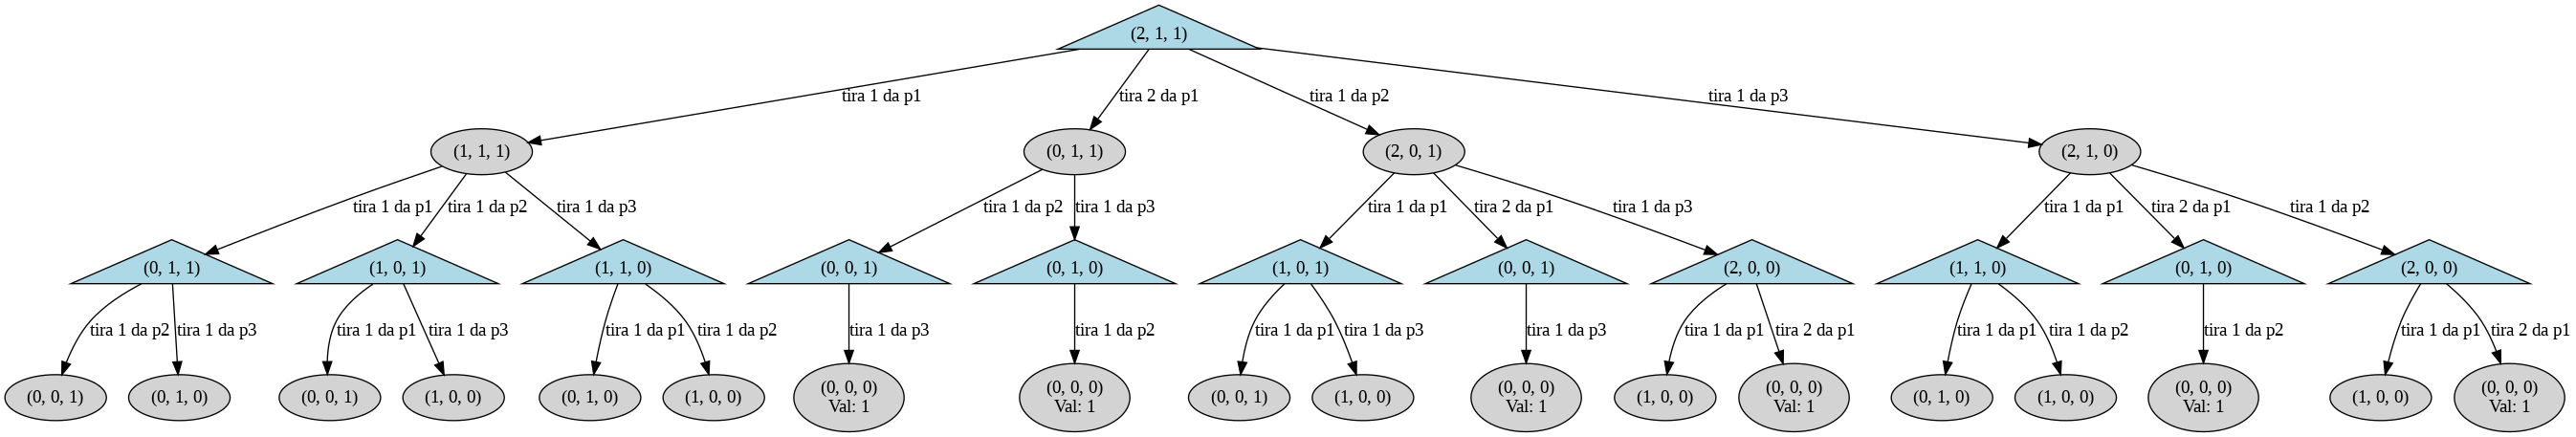

In [ ]:
import math
from graphviz import Digraph
from IPython.display import Image, display # Importar Image e display

class NimVisualizer:
    def __init__(self, initial_state):
        self.dot = Digraph(comment='Árvore de Busca Nim')
        self.node_count = 0
        self.initial_state = initial_state

    def get_node_style(self, is_maximizing):
        # Estilização conforme sua imagem: MAX = Triângulo, MIN = Oval
        if is_maximizing:
            return {'shape': 'triangle', 'style': 'filled', 'fillcolor': 'lightblue'}
        else:
            return {'shape': 'ellipse', 'style': 'filled', 'fillcolor': 'lightgrey'}

    def visualize(self, state, depth, is_maximizing, parent_name=None, edge_label=""):
        # Cria um identificador único para o nó
        node_id = f"node_{self.node_count}"
        self.node_count += 1

        # Define o rótulo do nó (Estado do jogo)
        label = str(state)
        if sum(state) == 0:
            val = -1 if is_maximizing else 1
            label += f"\nVal: {val}"

        # Adiciona o nó com o estilo correspondente
        style = self.get_node_style(is_maximizing)
        self.dot.node(node_id, label, **style)

        # Conecta ao pai
        if parent_name:
            self.dot.edge(parent_name, node_id, label=edge_label)

        # Condição de parada (Vitória ou profundidade máxima)
        if sum(state) == 0 or depth == 0:
            return

        # Explora as jogadas possíveis
        for i, count in enumerate(state):
            for amount in range(1, count + 1):
                new_state = list(state)
                new_state[i] -= amount

                # Chamada recursiva para o próximo nível
                self.visualize(tuple(new_state), depth - 1, not is_maximizing,
                               node_id, f"tira {amount} da p{i+1}")

    def render(self, filename='arvore_nim'):
        self.visualize(self.initial_state, depth=3, is_maximizing=True)
        output_path = self.dot.render(filename, format='png', cleanup=True)
        print(f"Árvore gerada e salva como {output_path}")
        display(Image(output_path)) # Exibe a imagem diretamente

# Execução com um estado pequeno para facilitar a visualização
# Se usar (3, 5, 7) a imagem ficará gigante!
viz = NimVisualizer((2, 1, 1))
viz.render()

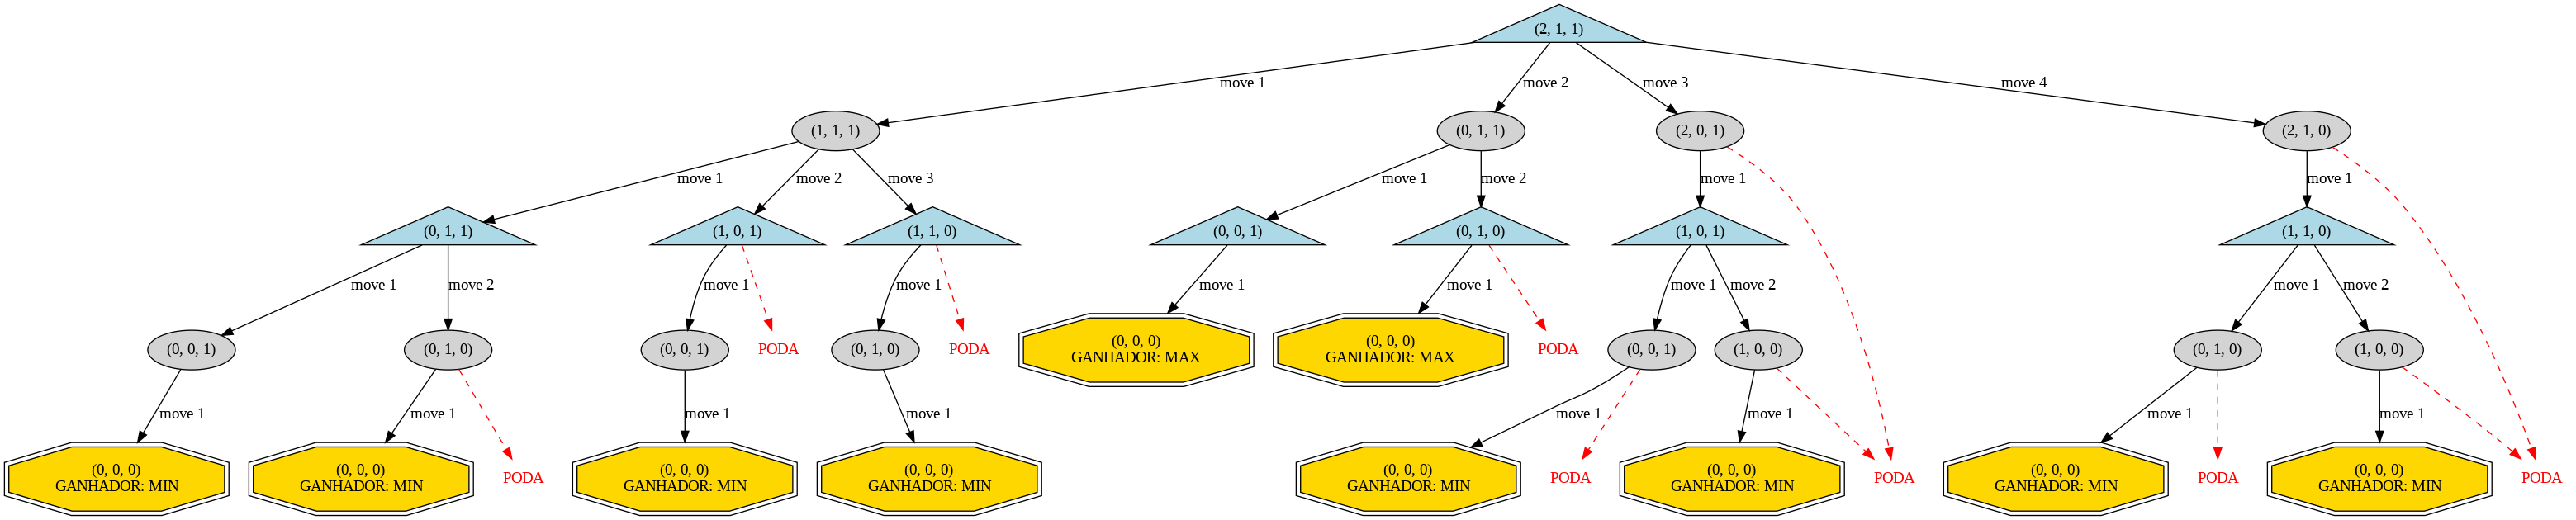

In [ ]:
import math
from graphviz import Digraph
from IPython.display import Image, display

class NimVisualizerAB:
    def __init__(self, initial_state):
        self.dot = Digraph(comment='Árvore Nim com Poda Alfa-Beta')
        self.node_count = 0
        self.initial_state = initial_state

    def get_style(self, is_maximizing, pruned=False):
        if pruned:
            return {'shape': 'point', 'color': 'red', 'label': 'PODA'}

        if is_maximizing:
            return {'shape': 'triangle', 'style': 'filled', 'fillcolor': 'lightblue'}
        else:
            return {'shape': 'ellipse', 'style': 'filled', 'fillcolor': 'lightgrey'}

    def alphabeta_viz(self, state, depth, alpha, beta, is_maximizing, parent_name=None, edge_label=""):
        node_id = f"node_{self.node_count}"
        self.node_count += 1

        # Condição de Terminal
        is_terminal = sum(state) == 0
        if is_terminal:
            # Se é vez do MAX, o MIN pegou a última (MAX perde)
            val = -1 if is_maximizing else 1
            winner = "MIN" if val == -1 else "MAX"
            label = f"{state}\nGANHADOR: {winner}"
            self.dot.node(node_id, label, shape='doubleoctagon', style='filled', fillcolor='gold')
            if parent_name: self.dot.edge(parent_name, node_id, label=edge_label)
            return val

        # Limite de profundidade
        if depth == 0:
            label = f"{state}\nFim Prof."
            self.dot.node(node_id, label, **self.get_style(is_maximizing))
            if parent_name: self.dot.edge(parent_name, node_id, label=edge_label)
            return 0

        # Criar nó atual
        label = str(state)
        self.dot.node(node_id, label, **self.get_style(is_maximizing))
        if parent_name: self.dot.edge(parent_name, node_id, label=edge_label)

        moves = self.get_moves(state)

        if is_maximizing:
            v = -math.inf
            for i, move in enumerate(moves):
                res = self.alphabeta_viz(move, depth - 1, alpha, beta, False, node_id, f"move {i+1}")
                v = max(v, res)
                alpha = max(alpha, v)
                if beta <= alpha:
                    # Visualizar a poda
                    puna_id = f"pruned_{self.node_count}"
                    self.dot.node(puna_id, "PODA", shape='none', fontcolor='red')
                    self.dot.edge(node_id, puna_id, color='red', style='dashed')
                    break
            return v
        else:
            v = math.inf
            for i, move in enumerate(moves):
                res = self.alphabeta_viz(move, depth - 1, alpha, beta, True, node_id, f"move {i+1}")
                v = min(v, res)
                beta = min(beta, v)
                if beta <= alpha:
                    # Visualizar a poda
                    puna_id = f"pruned_{self.node_count}"
                    self.dot.node(puna_id, "PODA", shape='none', fontcolor='red')
                    self.dot.edge(node_id, puna_id, color='red', style='dashed')
                    break
            return v

    def get_moves(self, state):
        moves = []
        for i, count in enumerate(state):
            for amount in range(1, count + 1):
                new_state = list(state)
                new_state[i] -= amount
                moves.append(tuple(new_state))
        return moves

    def render(self, filename='arvore_nim_poda'):
        self.alphabeta_viz(self.initial_state, 4, -math.inf, math.inf, True)
        path = self.dot.render(filename, format='png', cleanup=True)
        display(Image(path))

# Execução com um estado reduzido para ver as podas claramente
viz = NimVisualizerAB((2, 1, 1))
viz.render()

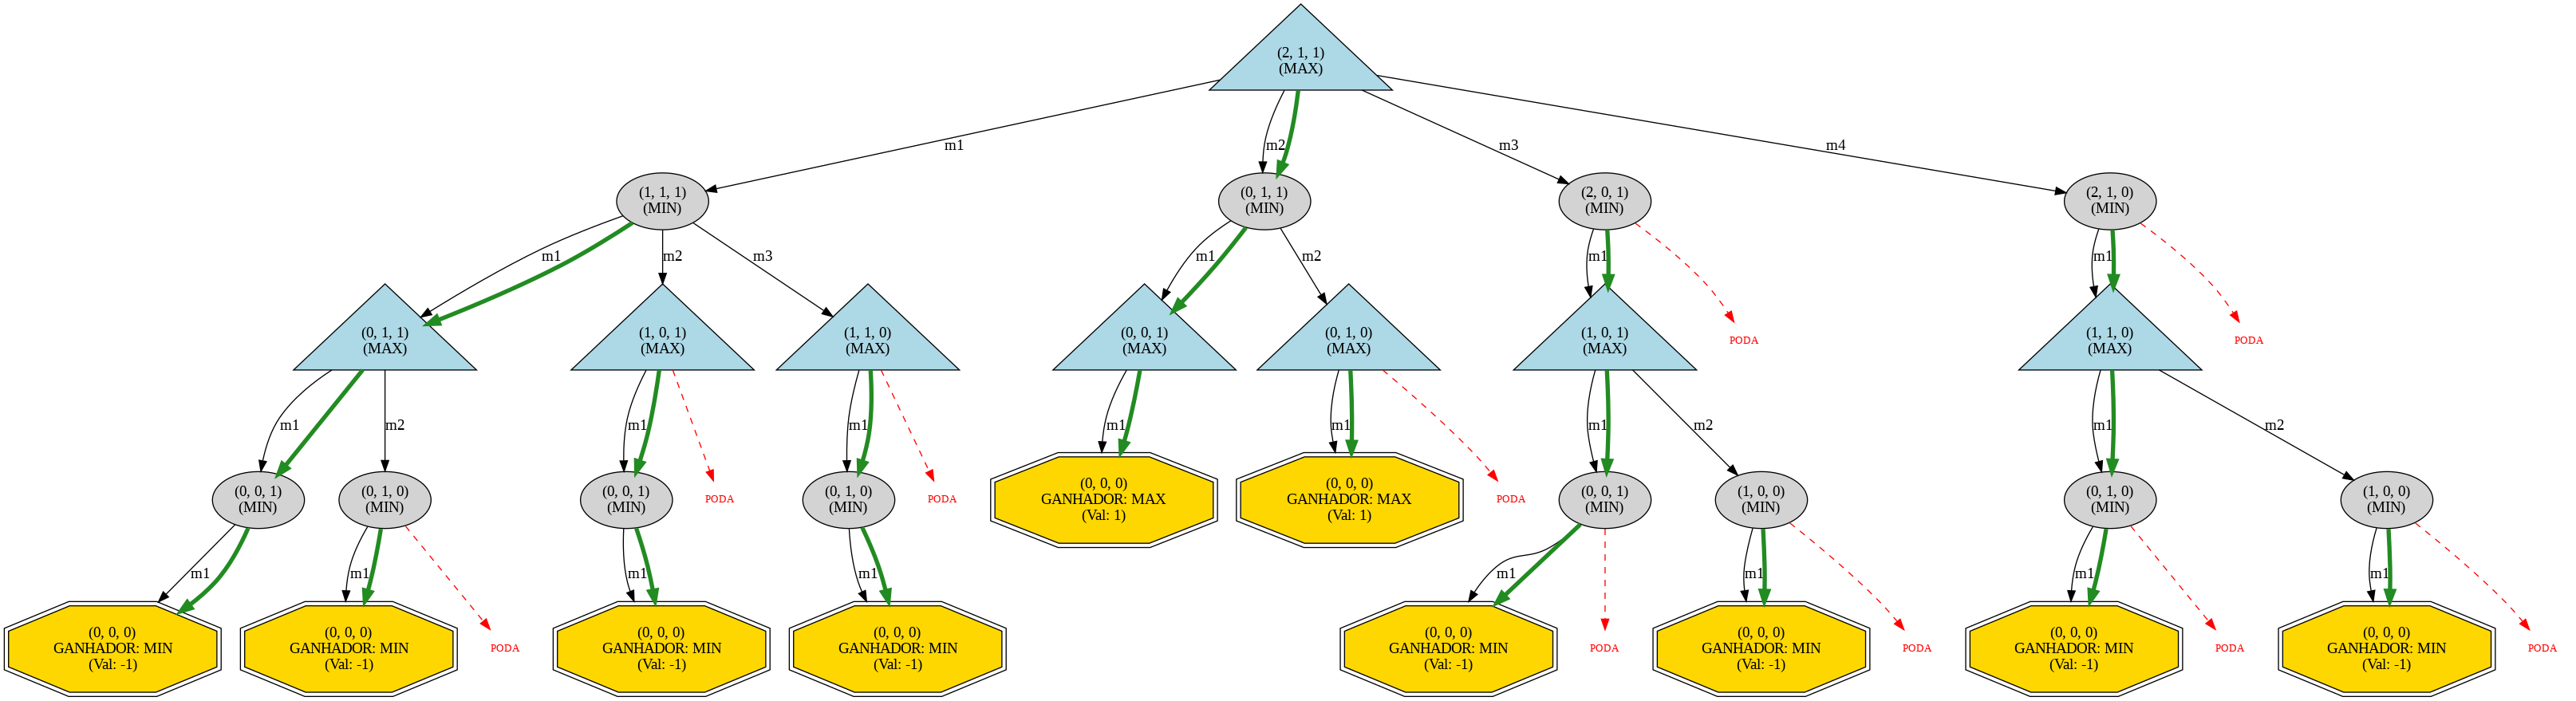

In [ ]:
import math
from graphviz import Digraph
from IPython.display import Image, display

class NimVisualizerPath:
    def __init__(self, initial_state):
        self.dot = Digraph(comment='Busca Nim com Caminho Otimizado')
        self.node_count = 0
        self.initial_state = initial_state

    def get_style(self, is_maximizing):
        if is_maximizing:
            return {'shape': 'triangle', 'style': 'filled', 'fillcolor': 'lightblue'}
        else:
            return {'shape': 'ellipse', 'style': 'filled', 'fillcolor': 'lightgrey'}

    def alphabeta_viz(self, state, depth, alpha, beta, is_maximizing, parent_name=None, edge_label=""):
        node_id = f"node_{self.node_count}"
        self.node_count += 1

        # 1. Verificação de Estado Terminal
        if sum(state) == 0:
            val = -1 if is_maximizing else 1
            winner = "MIN" if val == -1 else "MAX"
            label = f"{state}\nGANHADOR: {winner}\n(Val: {val})"
            self.dot.node(node_id, label, shape='doubleoctagon', style='filled', fillcolor='gold')
            return val, node_id

        # Define player label for current node
        player_label_text = "MAX" if is_maximizing else "MIN"

        if depth == 0:
            node_display_label = f"{state}\nLimite\n({player_label_text})"
            self.dot.node(node_id, node_display_label, **self.get_style(is_maximizing))
            return 0, node_id

        # 2. Criar Nó Atual
        current_style = self.get_style(is_maximizing)
        node_display_label = f"{state}\n({player_label_text})"
        self.dot.node(node_id, node_display_label, **current_style)

        moves = self.get_moves(state)
        best_child_node = None

        if is_maximizing:
            v = -math.inf
            for i, move in enumerate(moves):
                res, child_id = self.alphabeta_viz(move, depth - 1, alpha, beta, False, node_id, f"m{i+1}")

                # Se este movimento melhorou nosso valor, ele é o candidato ao caminho escolhido
                if res > v:
                    v = res
                    best_child_node = child_id

                # Desenha a aresta padrão (será sobrescrita se for o melhor caminho)
                self.dot.edge(node_id, child_id, label=f"m{i+1}")

                alpha = max(alpha, v)
                if beta <= alpha:
                    self.mark_pruning(node_id)
                    break
        else:
            v = math.inf
            for i, move in enumerate(moves):
                res, child_id = self.alphabeta_viz(move, depth - 1, alpha, beta, True, node_id, f"m{i+1}")

                if res < v:
                    v = res
                    best_child_node = child_id

                self.dot.edge(node_id, child_id, label=f"m{i+1}")

                beta = min(beta, v)
                if beta <= alpha:
                    self.mark_pruning(node_id)
                    break

        # 3. DESTACAR O CAMINHO ESCOLHIDO
        # Pintamos de verde a aresta que leva ao melhor resultado encontrado para este nó
        if best_child_node:
            self.dot.edge(node_id, best_child_node, color='forestgreen', penwidth='4.0')

        return v, node_id

    def mark_pruning(self, node_id):
        puna_id = f"p_{self.node_count}"
        self.node_count += 1
        self.dot.node(puna_id, "PODA", shape='none', fontcolor='red', fontsize='10')
        self.dot.edge(node_id, puna_id, color='red', style='dashed')

    def get_moves(self, state):
        moves = []
        for i, count in enumerate(state):
            for amount in range(1, count + 1):
                new_state = list(state)
                new_state[i] -= amount
                moves.append(tuple(new_state))
        return moves

    def render(self, filename='nim_caminho_otimo'):
        self.alphabeta_viz(self.initial_state, 4, -math.inf, math.inf, True)
        path = self.dot.render(filename, format='png', cleanup=True)
        display(Image(path))

# Execução
viz = NimVisualizerPath((2, 1, 1))
viz.render()